In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
import os, sys
module_path = os.path.abspath(os.path.join('..', "src"))
if module_path not in sys.path:
    sys.path.append(module_path)
import train

In [3]:
config = train.train_config
root_path = ".."
models_path = os.path.join(root_path, "models_test")
if not os.path.isdir(models_path):
    os.mkdir(models_path)
ds_dir = os.path.join(root_path, "dataset","UBO2014")
ds_path = os.path.join(ds_dir,".".join((config["ds_name"], "btf")) )
save_path = os.path.join(models_path, config["ds_name"])
            
if not os.path.isdir(save_path):
    os.mkdir(save_path)

config["out_path"] = os.path.join(save_path,'{}.pth'.format("test"))

importing btf dataset: ..\dataset\UBO2014\leather11.btf 



  0%|          | 0/1024 [00:00<?, ?it/s]

NeuBTF(
  (tex): NeuMipMap(
    (levels): ModuleList(
      (0): NeuTex()
      (1): NeuTex()
      (2): NeuTex()
      (3): NeuTex()
    )
  )
  (off_tex): NeuMipMap(
    (levels): ModuleList(
      (0): NeuTex()
      (1): NeuTex()
      (2): NeuTex()
      (3): NeuTex()
    )
  )
  (net): Siren(
    (net): Sequential(
      (0): SineLayer(
        (linear): Linear(in_features=34, out_features=32, bias=True)
      )
      (1): SineLayer(
        (linear): Linear(in_features=32, out_features=32, bias=True)
      )
      (2): SineLayer(
        (linear): Linear(in_features=32, out_features=32, bias=True)
      )
      (3): Linear(in_features=32, out_features=3, bias=True)
    )
  )
  (off_net): Siren(
    (net): Sequential(
      (0): SineLayer(
        (linear): Linear(in_features=31, out_features=32, bias=True)
      )
      (1): SineLayer(
        (linear): Linear(in_features=32, out_features=32, bias=True)
      )
      (2): SineLayer(
        (linear): Linear(in_features=32, out_f

  0%|          | 0/15 [00:00<?, ?it/s]

  0%|          | 0/1024 [00:00<?, ?it/s]

C:\Users\lucaq\Documents\GitHub\Traverse\NeuBTF\src\utils.py:20: RuntimeWarning: invalid value encountered in power
  return image**(1./gamma)
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


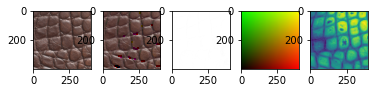

  0%|          | 0/1024 [00:00<?, ?it/s]

In [ ]:
train.train(config)